# Data Exploration 

In [7]:
import pandas as pd
from collections import Counter

# Load the dataset
file ="/kaggle/input/emotrainval/EmoTrain.csv"
df = pd.read_csv(file)

val_path = "/kaggle/input/emotrainval/EmoVal.csv"
df_test = pd.read_csv(val_path)

In [8]:
# Information of the dataset 
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190102 entries, 0 to 190101
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   190102 non-null  int64 
 1   text         190102 non-null  object
 2   praise       190102 non-null  int64 
 3   amusement    190102 non-null  int64 
 4   anger        190102 non-null  int64 
 5   disapproval  190102 non-null  int64 
 6   confusion    190102 non-null  int64 
 7   interest     190102 non-null  int64 
 8   sadness      190102 non-null  int64 
 9   fear         190102 non-null  int64 
 10  joy          190102 non-null  int64 
 11  love         190102 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 17.4+ MB
None


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0     0
text           0
praise         0
amusement      0
anger          0
disapproval    0
confusion      0
interest       0
sadness        0
fear           0
joy            0
love           0
dtype: int64



Label Counts:
confusion      63392
praise         29980
joy            24250
love           22525
anger          18288
sadness        15381
disapproval    14664
amusement      13277
interest       12010
fear            4049
dtype: int64


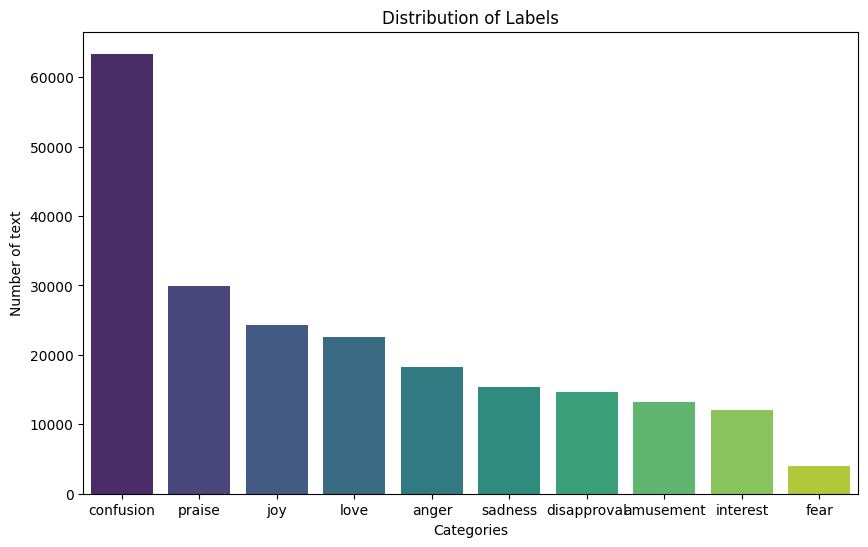

In [10]:

import matplotlib.pyplot as plt 
import seaborn as sns 
# Data distribution of label counts 
Label_columns = ['praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']

# Count total occurences of each label 
label_counts = df[Label_columns].sum().sort_values(ascending=False)
print("\nLabel Counts:")
print(label_counts)

# Plot the label distribution
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Labels")
plt.xlabel("Categories")
plt.ylabel("Number of text")
plt.show()

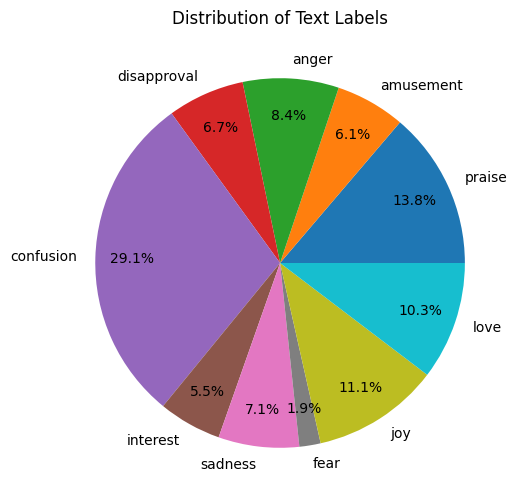

In [11]:
temp = {}
# Count number of each category of text
for x in df.columns[2:]:
    temp[x] = df[x].sum()

# Plot the pie chart
plt.figure(figsize=(7, 6))
plt.pie(
    temp.values(),
    labels=temp.keys(), 
    autopct='%1.1f%%', 
    pctdistance=0.80
)
plt.title('Distribution of Text Labels')
plt.show()

In [12]:
# Count of Multi-label comment 
df['Multi_labele_comment'] = df[Label_columns].sum(axis=1)

print(f"Multi label comments : {(df['Multi_labele_comment'] > 1).sum()}")


Multi label comments : 27753


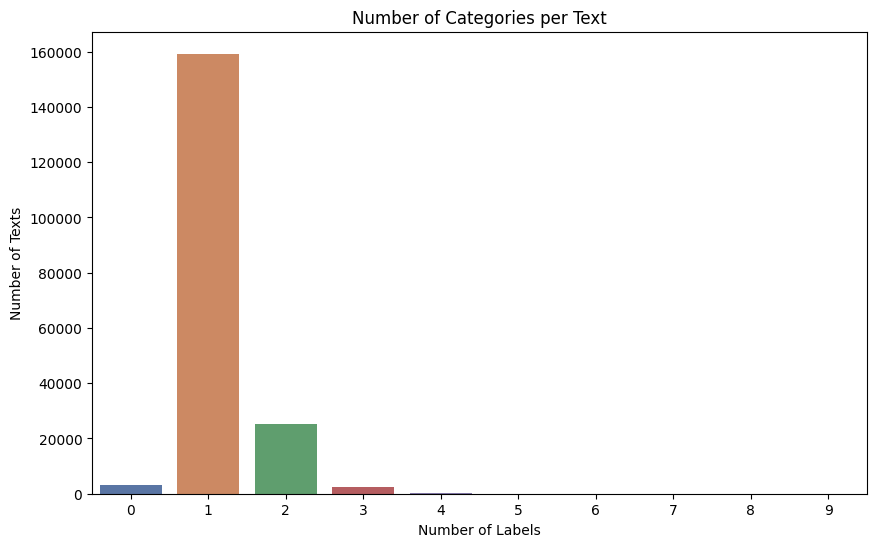

In [13]:
# Check the number of multi-label Text 
df['multi_lable_count'] = df[Label_columns].sum(axis=1)
multi_label_distribution = df['multi_lable_count'].value_counts().sort_index()

# Plot multi-label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=multi_label_distribution.index, y=multi_label_distribution.values, palette="deep")
plt.title("Number of Categories per Text")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.show()

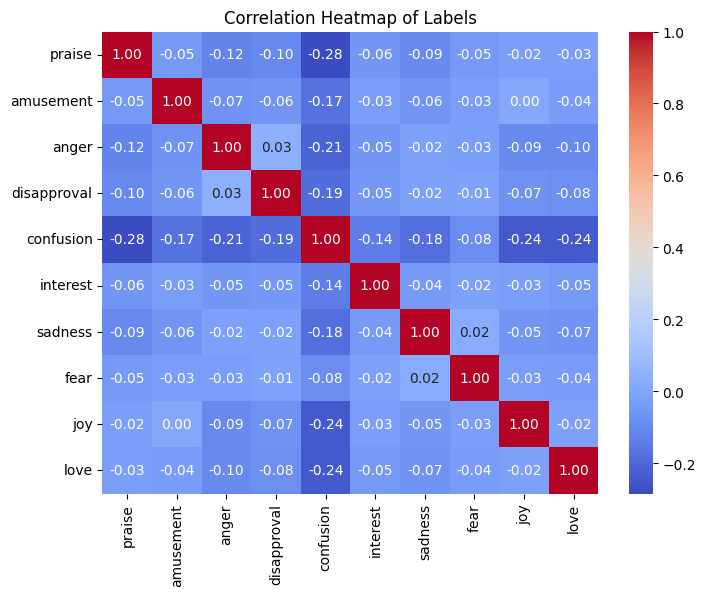

In [14]:
# Correlation heatmap for thelabels 
plt.figure(figsize=(8, 6))
sns.heatmap(df[Label_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Labels")
plt.show()

### Text Analysis 

In [15]:
# Average comment lengths (character, words)

df['char_length'] = df['text'].apply(len)
df['word_length'] = df['text'].apply(lambda x: len(x.split()))

avg_char_length = df['char_length'].mean()
avg_word_length = df['word_length'].mean()

print(f"Average Sentence Length (Characters): {avg_char_length:.2f}")
print(f"Average Sentence Length (Words): {avg_word_length:.2f}")

Average Sentence Length (Characters): 69.35
Average Sentence Length (Words): 13.00


Word Cloud:
- A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance in the text. It's a simple and intuitive way to visualize and analyze large amounts of text. 



In [16]:
from wordcloud import WordCloud

def plot_wordcloud(column_name, width=720, height=520):

    if column_name not in df.columns[2:12]:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    text = ' '.join(df[df[column_name] == 1]['text'])
    wordcloud_ = WordCloud(width=width, height=height, background_color='black').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name} Comments')
    plt.show()

    word_frequencies = wordcloud_.words_

    # Top 20 Words used in comments
    words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
    words.reset_index(inplace=True)
    words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 20 words used in {column_name} comments:')
    print(words.head(20))

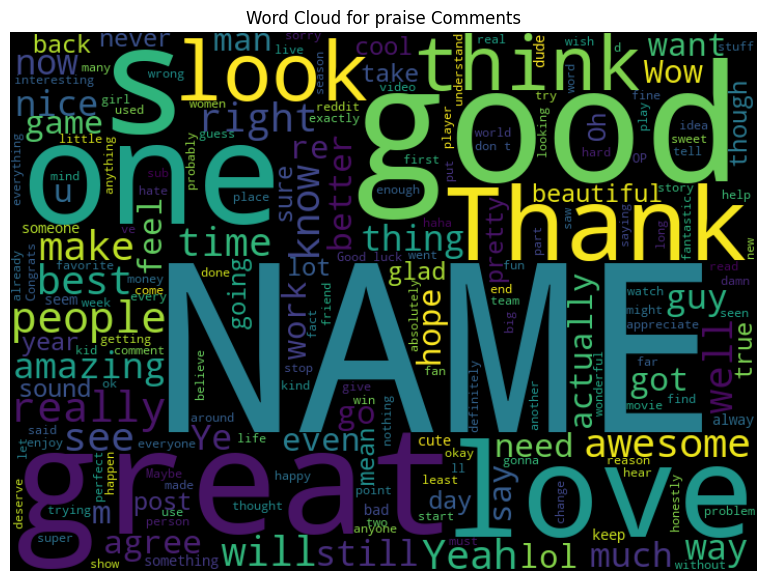

Top 20 words used in praise comments:
       Word  Normalized Frequencies
0      NAME              100.000000
1      good               36.956957
2         s               33.713714
3     great               31.611612
4       one               30.090090
5      love               28.068068
6     Thank               23.623624
7      look               22.042042
8     think               20.380380
9    people               19.959960
10   really               18.578579
11     make               16.916917
12     know               16.696697
13     best               16.556557
14      see               16.276276
15     will               15.895896
16     Yeah               15.835836
17  awesome               15.515516
18    right               14.854855
19     well               14.614615


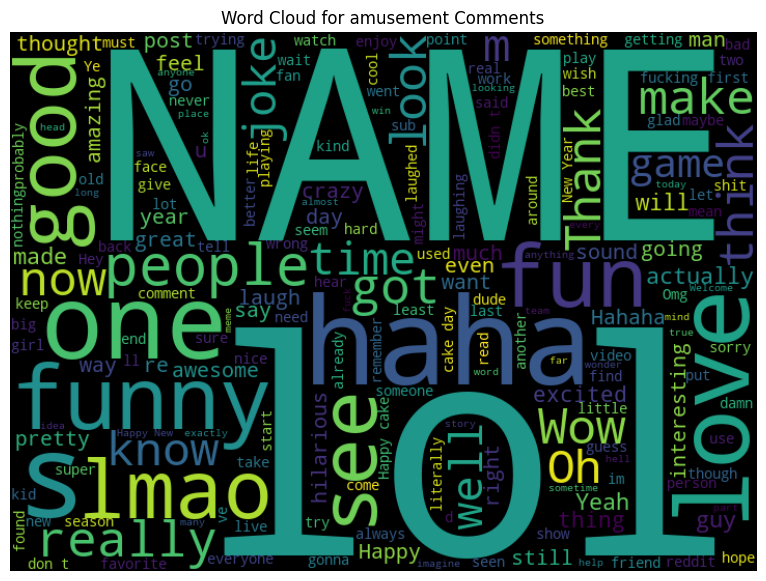

Top 20 words used in amusement comments:
      Word  Normalized Frequencies
0      lol              100.000000
1     NAME               77.817531
2     haha               27.656530
3        s               26.225403
4      one               19.928444
5     love               18.890877
6    funny               18.246869
7      fun               16.815742
8     good               16.207513
9     lmao               15.456172
10     see               15.062612
11  people               15.062612
12  really               14.168157
13     got               14.168157
14     Wow               13.488372
15    make               13.488372
16   Thank               13.309481
17   think               13.130590
18    look               13.023256
19     now               12.629696


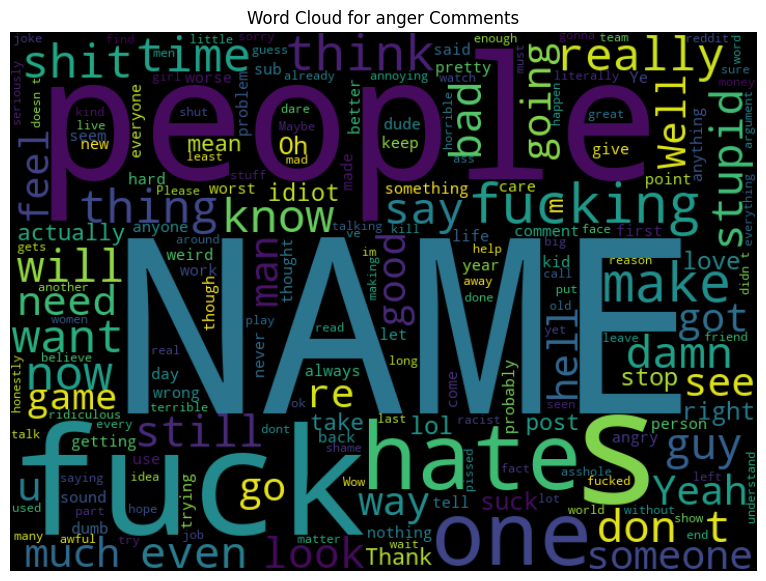

Top 20 words used in anger comments:
       Word  Normalized Frequencies
0      NAME              100.000000
1    people               39.927104
2         s               34.724983
3      fuck               29.854208
4      hate               26.905235
5       one               25.314778
6   fucking               21.669980
7      make               21.040424
8     think               17.958913
9      time               16.368456
10      now               16.335321
11     know               15.970842
12     shit               15.937707
13   really               15.838304
14    thing               15.805169
15     want               15.805169
16     damn               14.413519
17    don t               14.413519
18     will               14.280981
19      say               14.214712


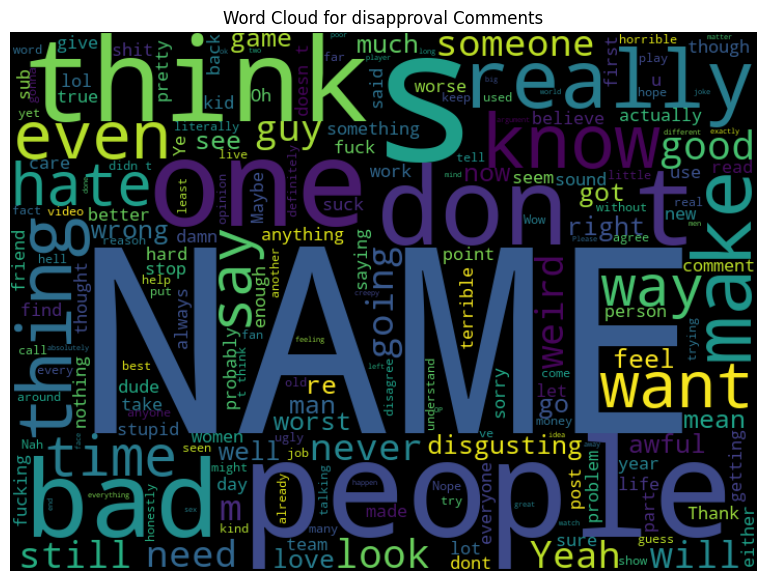

Top 20 words used in disapproval comments:
      Word  Normalized Frequencies
0     NAME              100.000000
1        s               45.364536
2   people               37.083708
3      one               29.477948
4    think               26.867687
5    don t               23.177318
6      bad               22.547255
7   really               21.602160
8     make               21.377138
9    thing               18.631863
10    know               18.181818
11    even               18.136814
12    want               17.686769
13    hate               17.641764
14     say               17.191719
15     way               17.101710
16    time               16.651665
17    good               15.841584
18    look               15.796580
19   weird               14.671467


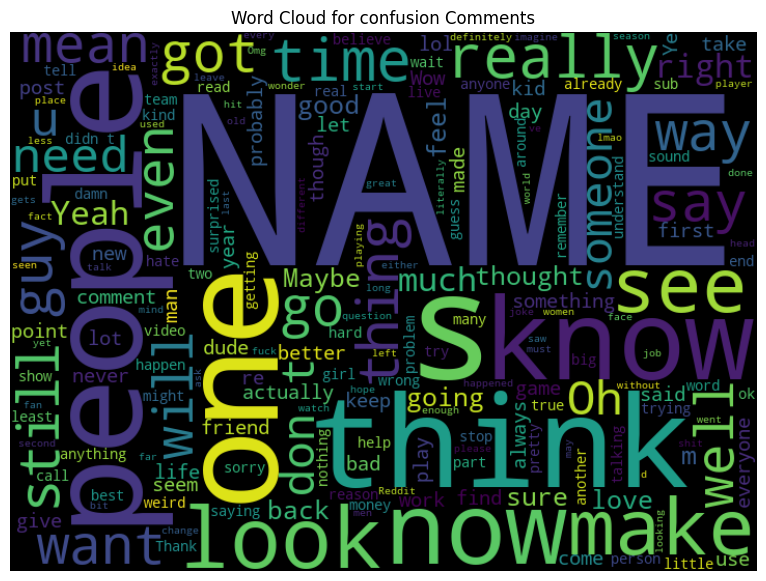

Top 20 words used in confusion comments:
      Word  Normalized Frequencies
0     NAME              100.000000
1        s               26.358934
2      one               20.787903
3   people               19.291683
4    think               18.280939
5     know               16.673299
6      now               13.099881
7     look               12.781536
8     make               12.256267
9      see               11.738957
10  really               11.715082
11    time               11.587744
12   thing               10.863510
13   still               10.768006
14     guy               10.362117
15     say               10.059690
16     got                9.908476
17      go                9.645842
18    want                9.621966
19     way                9.462793


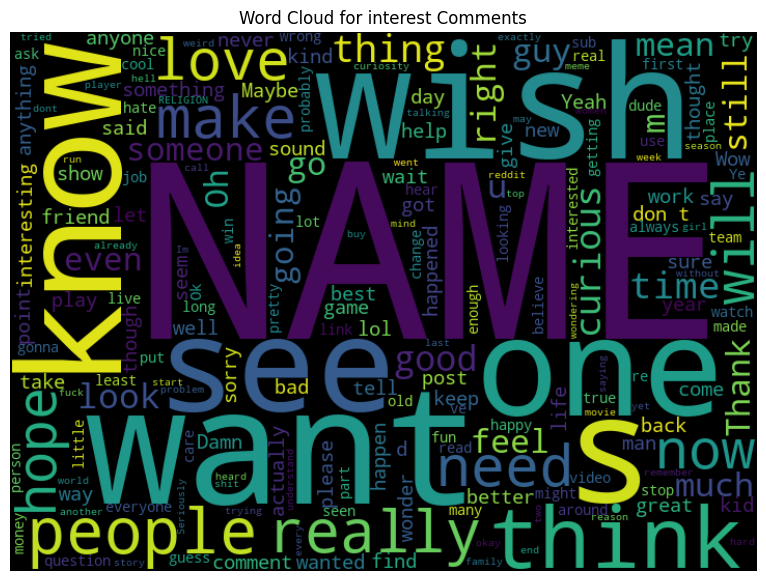

Top 20 words used in interest comments:
       Word  Normalized Frequencies
0      NAME              100.000000
1      want               32.557078
2      wish               30.228311
3         s               27.762557
4      know               24.657534
5       one               23.378995
6       see               22.922374
7     think               21.598174
8    people               21.141553
9    really               18.675799
10     make               17.899543
11     love               16.940639
12     need               16.666667
13     will               16.484018
14      now               15.525114
15     hope               14.977169
16    thing               14.931507
17     time               14.246575
18  curious               13.652968
19     good               12.831050


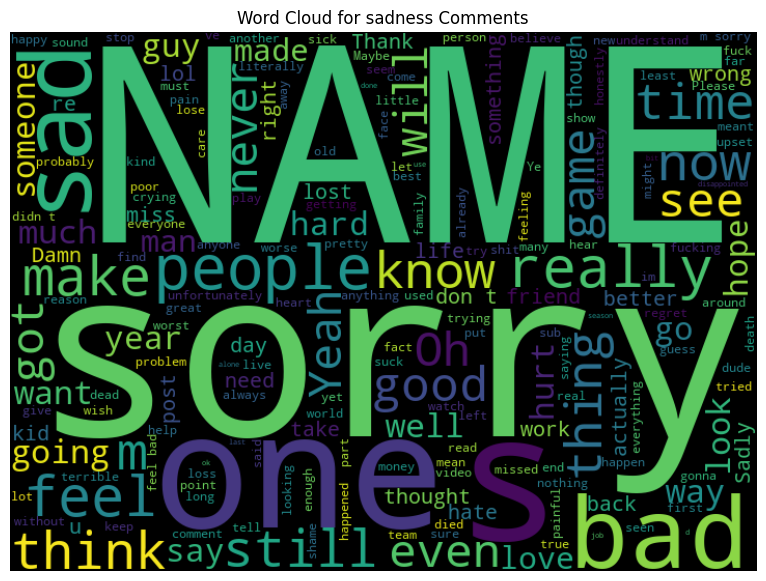

Top 20 words used in sadness comments:
      Word  Normalized Frequencies
0     NAME              100.000000
1    sorry               73.445378
2        s               37.310924
3      one               30.000000
4      bad               29.411765
5      sad               29.201681
6   people               27.184874
7   really               23.823529
8     feel               22.815126
9     make               21.428571
10       m               19.831933
11   still               19.453782
12   think               19.075630
13     now               18.781513
14    know               17.941176
15   thing               17.647059
16    time               17.058824
17    good               15.546218
18     see               15.336134
19     got               14.411765


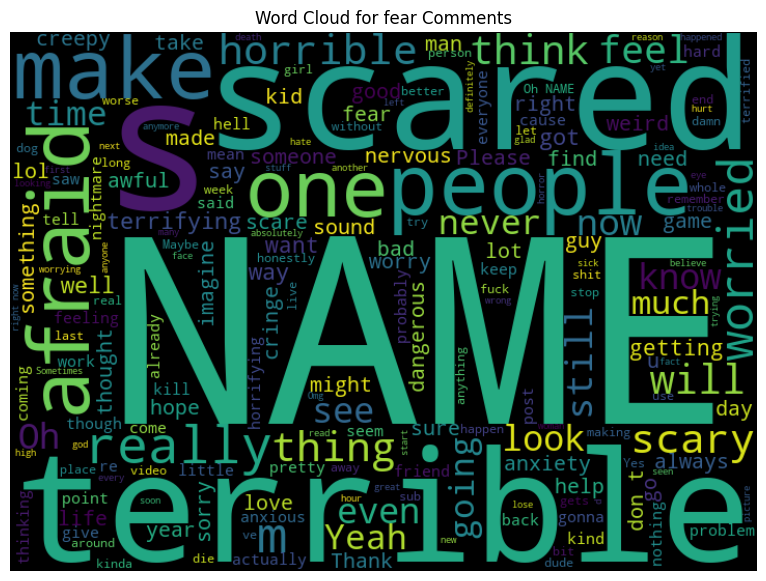

Top 20 words used in fear comments:
        Word  Normalized Frequencies
0       NAME              100.000000
1          s               45.585875
2   terrible               32.905297
3     scared               32.423756
4     people               31.460674
5       make               30.979133
6     afraid               30.497592
7        one               28.250401
8     really               26.805778
9          m               26.163724
10   worried               23.916533
11  horrible               23.434992
12     thing               23.113965
13     scary               22.953451
14      will               21.669342
15     think               21.348315
16      feel               19.422151
17     still               18.780096
18       now               17.656501
19      even               16.693419


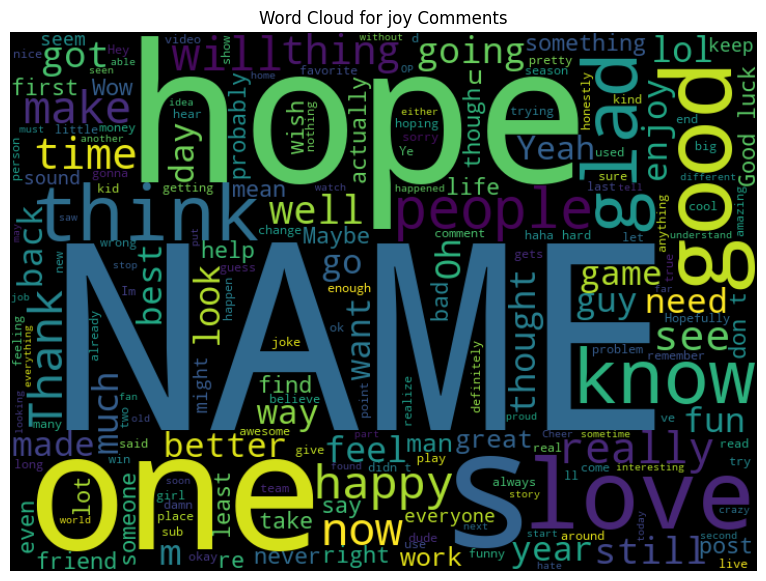

Top 20 words used in joy comments:
      Word  Normalized Frequencies
0     NAME              100.000000
1     hope               47.366985
2        s               33.969986
3      one               33.587995
4     love               26.248295
5     good               26.221010
6    think               25.593452
7     know               25.129604
8     glad               24.829468
9   people               24.556617
10   happy               24.092769
11   Thank               24.092769
12    will               23.574352
13    make               22.592087
14     now               22.319236
15  really               21.855389
16    time               21.664393
17     see               20.709413
18   thing               19.072306
19    well               18.390177


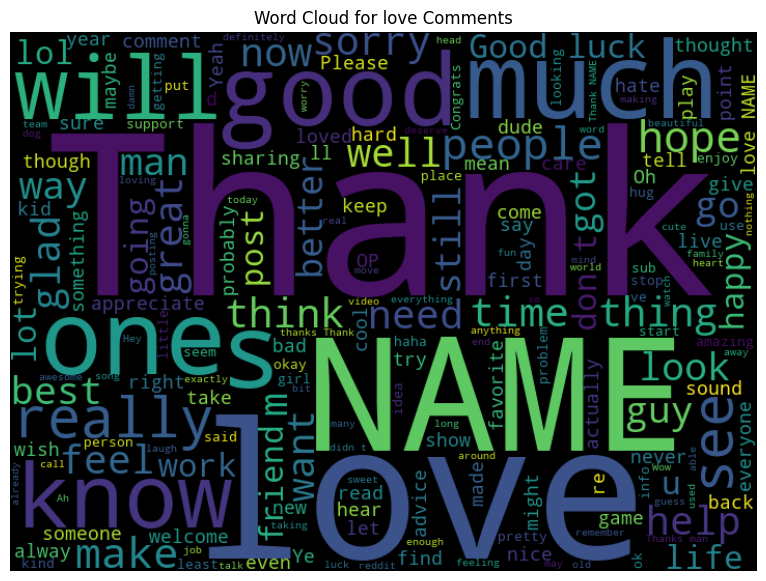

Top 20 words used in love comments:
      Word  Normalized Frequencies
0    Thank              100.000000
1     love               68.234923
2     NAME               45.547837
3     much               14.935270
4        s               14.777392
5      one               14.493211
6     good               13.261762
7     know               10.625197
8     will               10.025260
9   really                9.977897
10     see                9.883170
11  people                9.662141
12    hope                9.220082
13    make                8.809599
14    time                8.383328
15   thing                7.909694
16   think                7.862330
17       m                7.562362
18    help                7.546574
19    need                7.546574


In [17]:
for label in Label_columns:
    plot_wordcloud(label)

# Text Processing

### Basic Cleanup 

In [18]:
# Important libraries 
import re
from nltk.corpus import stopwords 
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Define the stopwords list 
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove special characters and punctuation using regex 
    text = re.sub(r'[^a-zA-Z\s]','',text)
    # Convert text to lowercase 
    text =  text.lower()
    # Tokenize and remove stopwords 
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string 
    return ' '.join(words)

# Apply the cleaning fucntion to the comment_text column 
df['cleaned_text'] = df['text'].apply(clean_text)

# Display a sample of the cleaned text 
print("Original Text:")
print(df['text'].iloc[0])
print("\nCleaned Text:")
print(df['cleaned_text'].iloc[0])

Original Text:
Is there some scripture you could quote me? I'd like to read up on it just to be sure for myself

Cleaned Text:
scripture could quote id like read sure


('name', 'good', 'like', 'great', 'im', 'thats', 'one', 'love', 'really', 'dont')


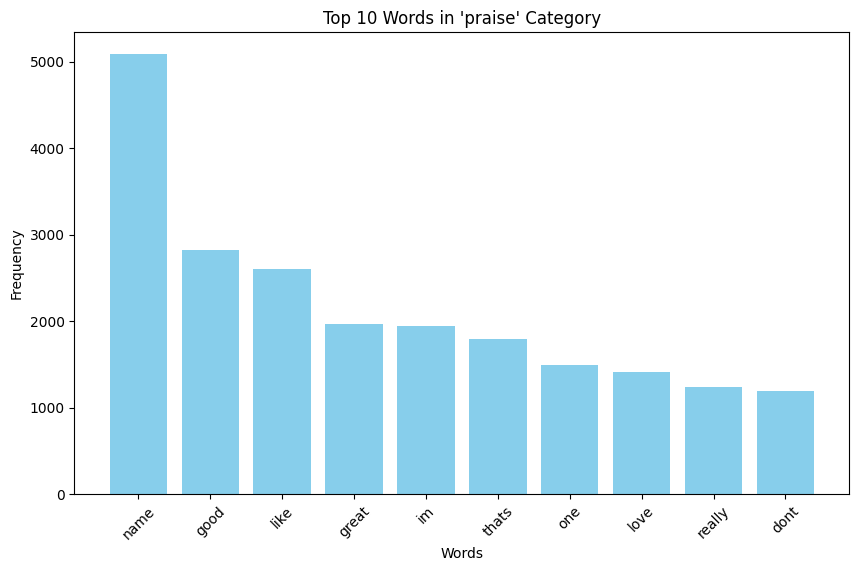

('lol', 'name', 'im', 'like', 'haha', 'thats', 'funny', 'fun', 'one', 'good')


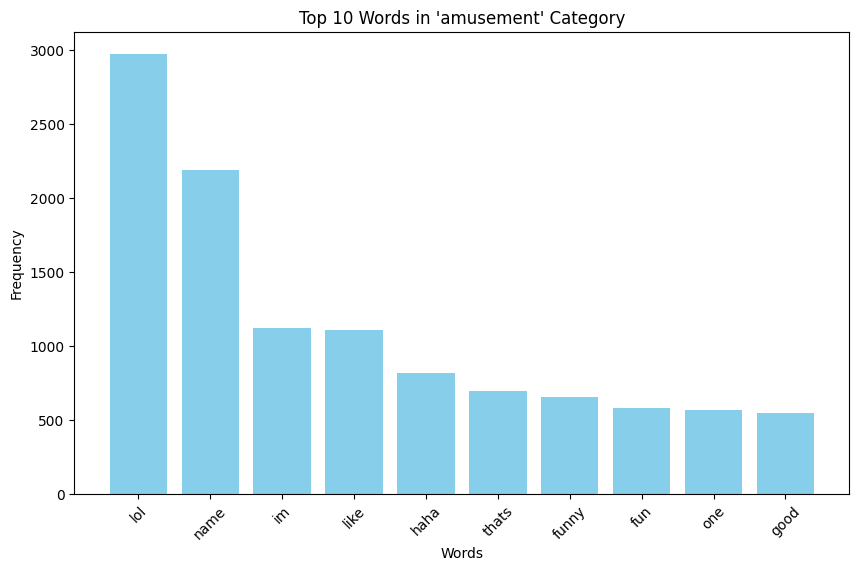

('name', 'dont', 'like', 'people', 'im', 'fuck', 'get', 'hate', 'fucking', 'youre')


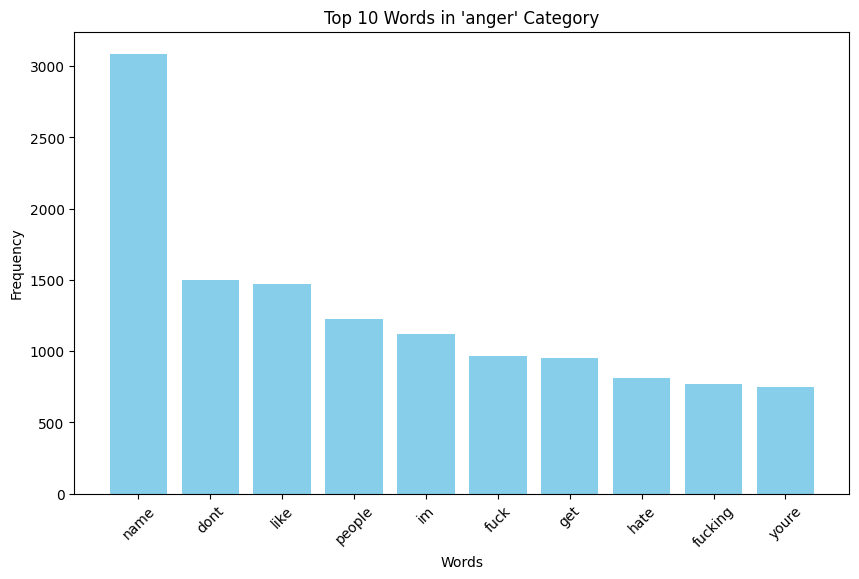

('name', 'dont', 'like', 'im', 'thats', 'people', 'think', 'cant', 'would', 'bad')


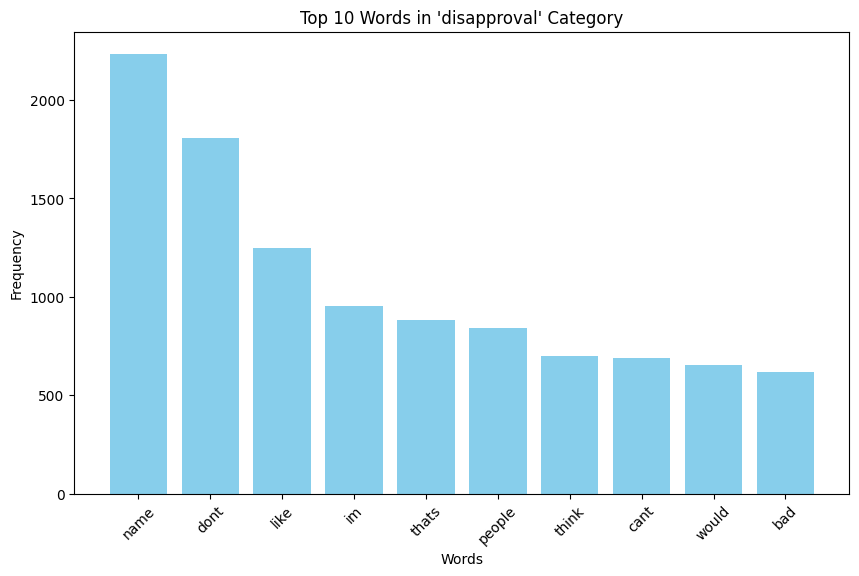

('name', 'like', 'dont', 'im', 'get', 'people', 'would', 'one', 'thats', 'know')


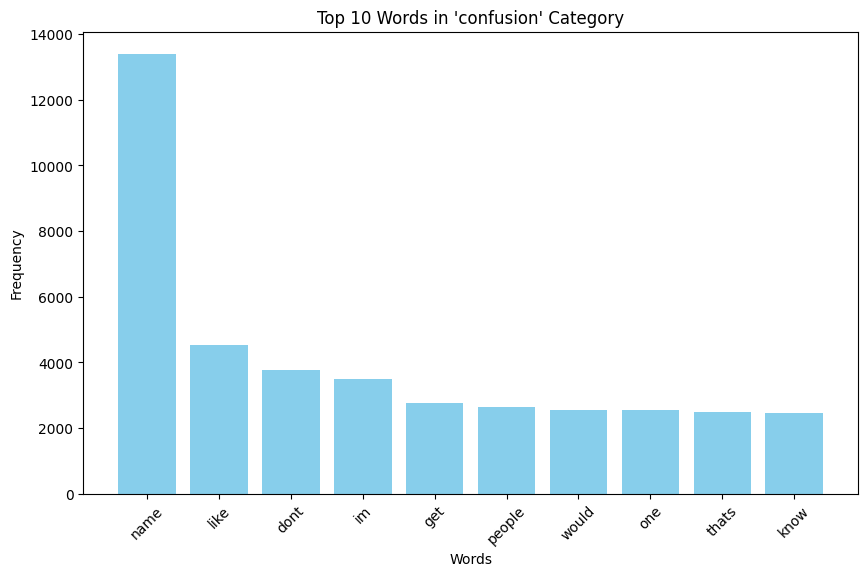

('name', 'like', 'im', 'would', 'wish', 'want', 'get', 'know', 'dont', 'see')


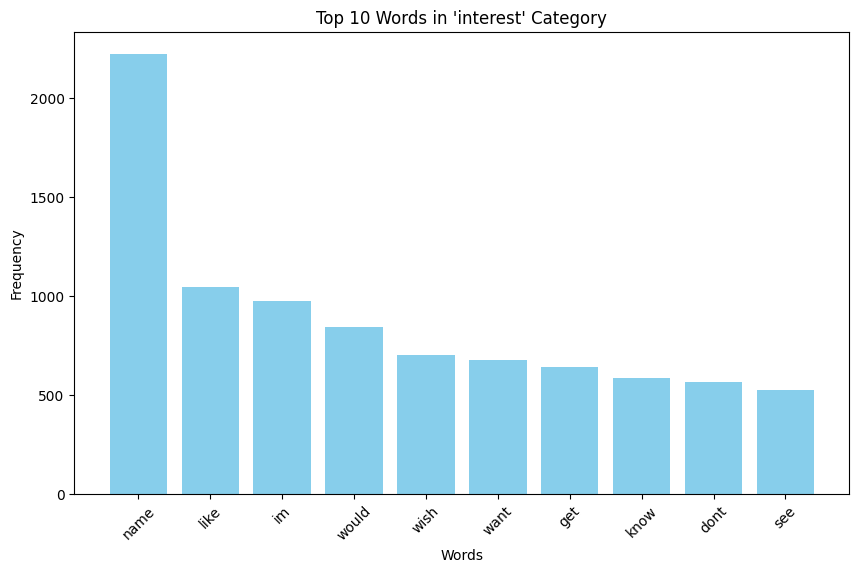

('name', 'sorry', 'im', 'like', 'bad', 'dont', 'sad', 'get', 'really', 'one')


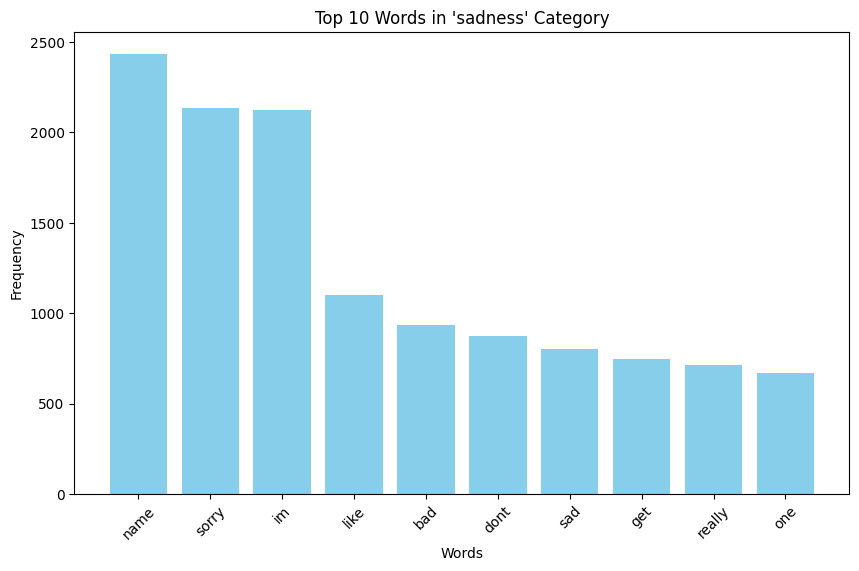

('im', 'name', 'like', 'dont', 'terrible', 'scared', 'thats', 'get', 'afraid', 'would')


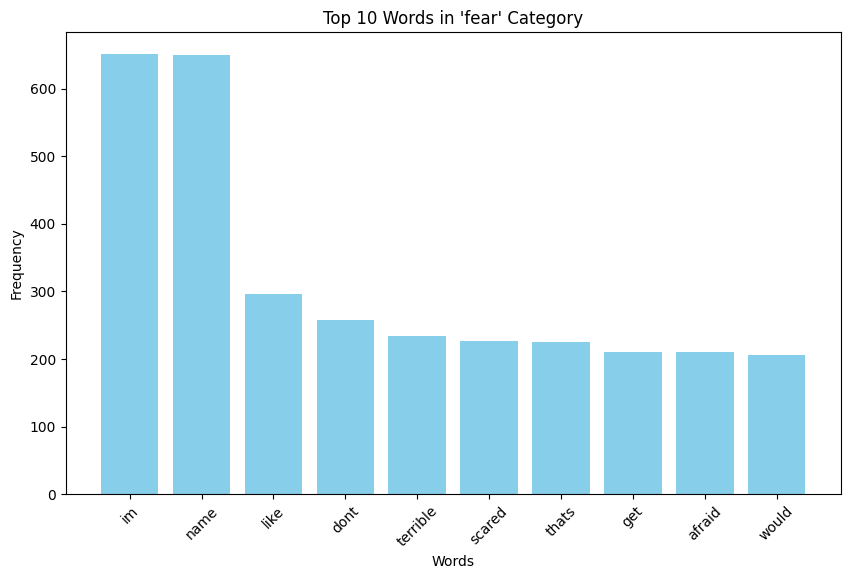

('name', 'im', 'like', 'hope', 'good', 'would', 'one', 'happy', 'get', 'dont')


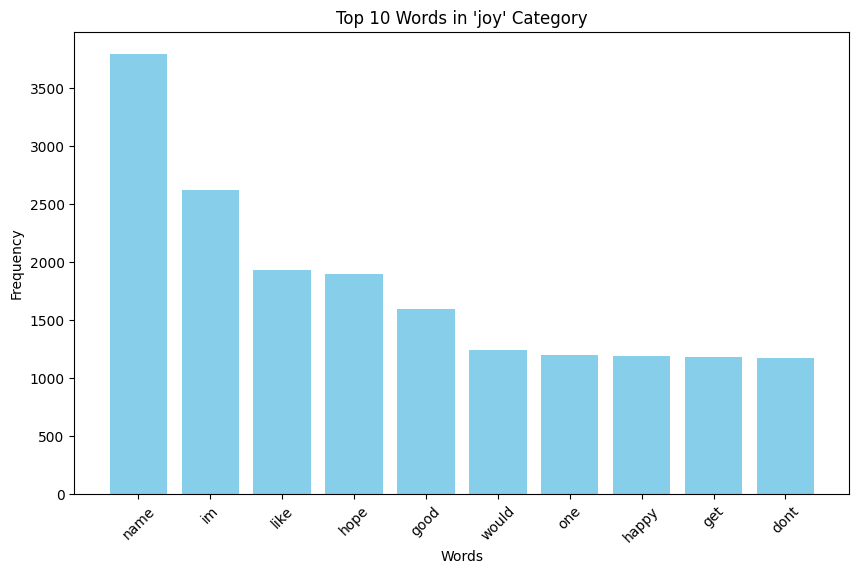

('love', 'thanks', 'name', 'thank', 'like', 'im', 'good', 'dont', 'much', 'get')


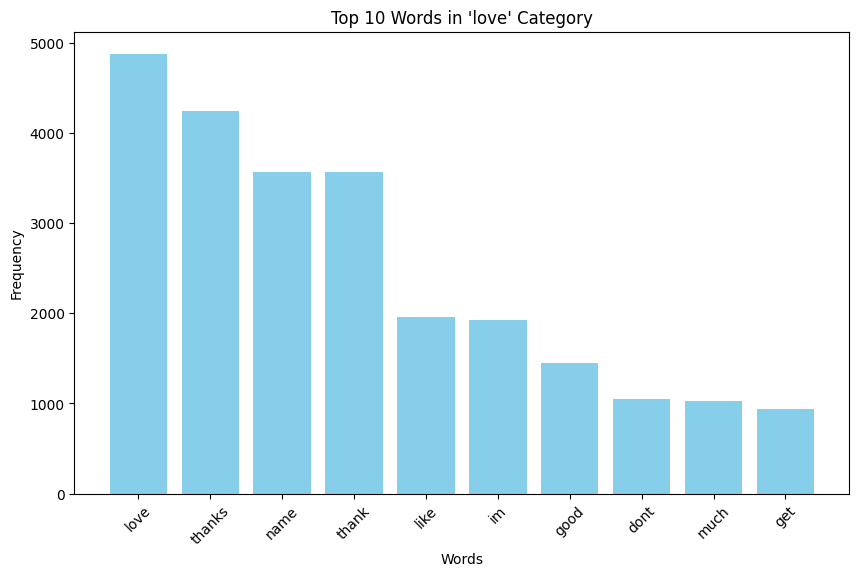

In [20]:
# Important libraries
from collections import Counter
# Function to get unique words from text in a specific category
def get_unique_words(text):
    # Split all text into words
    all_words = " ".join(text).split()
    # Count the frequency of each word
    return Counter(all_words)  

# Analyze unique words in each category
unique_words_per_category = {} 

for label in Label_columns:
    # Filter comments for the label
    category_text = df[df[label] == 1]['cleaned_text']  
    word_counts = get_unique_words(category_text)
    # Ensure the variable name is consistent
    unique_words_per_category[label] = word_counts 

# Display and visualize the top 10 unique words for each category
for label, word_counts in unique_words_per_category.items():
    # Check if there are enough words in the category
    if len(word_counts) > 0:
        # Get the top 10 words and their counts
        top_words = word_counts.most_common(10)
        # Unpack into separate lists for words and counts
        words, counts = zip(*top_words) 
        print(words)
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top 10 Words in '{label}' Category")
        plt.xlabel("Words")
        
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No words available for category: {label}")

- For NLP tasks, XGBoost doesn't work directly on raw text data. The text needs to be converted into numerical representations using technique such as TF - IDF. 

- We have already preprocessed the text remove special characters, stopwords, and lowercase).

- TF-IDF is a statistical measure used in text processing to evaluate how important a word is to a document relative to the entire dataset. 

Why TF-IDF is important for Xgboost?
Because cannot work directly with text data, as it requires numerical features. 
- word importance: TF_IDF ensures that rare but important words get higher weights, while common words have lower weights

### XGBoost
XGBoost is a powerful and efficient implementation of gradient boosting. It works by creating an ensemble of decision trees, where each tree corrects the errors of the previous ones. It is widely used for both classification and regression problems due to its performance and flexibility. 

- Split the dataset into training and testing sets (for now just to check if the model is giving good results)
- Train an XGBoost model for each label
- Evaluate the model using metrics such accuracy, F1-score, precision, and recall.

For each label, XGBoost builds decision tress to classify text.
TF-IDF ensures that the text is converted into features XGBoost can use. 


In [25]:
df_t

Unnamed: 0                                               text  praise  \
0               0  This is the same federal government that's bee...       0   
1               1  The Sunshine Skyway Bridge? I'm near that, too...       1   
2               2                           But in an even lower res       0   
3               3  Don't be so hard on yourself. Often, things ne...       0   
4               4         Don't worry. You'll grow out of Pearl Jam.       0   
...           ...                                                ...     ...   
10557       10557  This and the Minneapolis miracle; I've never h...       0   
10558       10558  Ugh I've had my mirena for a few years. I get ...       0   
10559       10559  Because they're having to compete and so we ge...       0   
10560       10560  >I don’t believe in changing the rules and law...       0   
10561       10561                  Not a perfect game with the error       0   

       amusement  anger  disapproval  confusion  interest  sadness  fear  joy  \
0              0      0            0          1         0        0     0    0   
1              0      0            0          0         0        0     0    1   
2              0      0            0          1         0        0     0    0   
3              0      0            0          0         0        0     0    0   
4              0      0            0          0         0        0     0    0   
...          ...    ...          ...        ...       ...      ...   ...  ...   
10557          0      0            1          0         0        0     0    0   
10558          0      0            1          0         0        0     0    1   
10559          0      0            0          1         0        0     0    0   
10560          0      0            0          1         0        0     0    0   
10561          0      0            0          1         0        0     0    0   

       love                               cleaned_comment_text  
0         0           federal government thats shut last month  
1         0        sunshine skyway bridge im near also thought  
2         0                                     even lower res  
3         1         dont hard often things need time dont beat  
4         1                    dont worry youll grow pearl jam  
...     ...                                                ...  
10557     0  minneapolis miracle ive never much pure uncont...  
10558     0      ugh ive mirena years get none bleeding cramps  
10559     0           theyre compete get exposed weakest bunch  
10560     0  dont believe changing rules laws however belie...  
10561     0                                 perfect game error  

[10562 rows x 13 columns]

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import xgboost as xgb
import numpy as np
from collections import Counter

def val(df_train, df_test):
    # Clean text for both datasets
    df_train['cleaned_comment_text'] = df_train['text'].apply(clean_text)
    df_test['cleaned_comment_text'] = df_test['text'].apply(clean_text)

    # Initialize TF-IDF vectorizer and fit only on the train set
    tfidf = TfidfVectorizer(max_features=10000)
    X_train = tfidf.fit_transform(df_train['cleaned_comment_text'])
    X_test = tfidf.transform(df_test['cleaned_comment_text'])  # Use transform() for test

    print(f"TF-IDF Train Matrix Shape: {X_train.shape}")
    print(f"TF-IDF Test Matrix Shape: {X_test.shape}")

    all_y_true = []
    all_y_pred = []
    preds = {}
    reals = {}

    for label in Label_columns:
        preds[label] = []
        reals[label] = []

    # Train an XGBoost model for each label
    for label in Label_columns:
        print(f"\nTraining model for {label}...\n")

        # Prepare the target
        y_train = df_train[label]
        y_test = df_test[label]

        # Apply undersampling on training data
        rus = RandomUnderSampler(random_state=42)
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
        print("Class distribution after undersampling:", Counter(y_train_resampled))

        # Train the XGBoost model
        model = xgb.XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            use_label_encoder=False,
            max_depth=6,
            learning_rate=0.1,
            n_estimators=100,
            random_state=42
        )

        model.fit(X_train_resampled, y_train_resampled)

        # Make predictions
        y_pred = model.predict(X_test)
        
        # Store predictions
        preds[label].extend(y_pred)  # Use extend instead of append
        reals[label].extend(y_test.tolist())  # Convert y_test to list before extending

        # Store for overall report
        all_y_true.extend(y_test.tolist())
        all_y_pred.extend(y_pred.tolist())

        # Individual label report
        print(f"Classification Report for {label}:")
        print(classification_report(y_test, y_pred))

    # Compute overall classification report
    print("\nOverall Classification Report:")
    print(classification_report(all_y_true, all_y_pred))
    
    return preds, reals

# Run the function
p, r = val(df, df_test)


TF-IDF Train Matrix Shape: (190102, 10000)
TF-IDF Test Matrix Shape: (10562, 10000)

Training model for praise...

Class distribution after undersampling: Counter({0: 29980, 1: 29980})
Classification Report for praise:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      8854
           1       0.41      0.48      0.44      1708

    accuracy                           0.81     10562
   macro avg       0.65      0.67      0.66     10562
weighted avg       0.82      0.81      0.81     10562


Training model for amusement...

Class distribution after undersampling: Counter({0: 13277, 1: 13277})
Classification Report for amusement:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      9835
           1       0.38      0.64      0.48       727

    accuracy                           0.90     10562
   macro avg       0.68      0.78      0.71     10562
weighted avg       0.93      0.90      0.

In [34]:
print(p['praise'][2])
print(r['praise'])

0
0


In [38]:
n = len(r['praise'])

def multilabel_accuracy():
    r1 = []
    y1 = []
    c = 0
    for i in range(n):
        temp = []
        temp2 = []
        for label in Label_columns:
            temp.append(p[label][i])
            temp2.append(r[label][i])
        if(temp == temp2):
            c+=1
        y1.append(temp)
        r1.append(temp2)
    c = c / n
    return r1,y1,c

r1,y1,ress = multilabel_accuracy()
print(f"multilabel accuracy:{ress}")

multilabel accuracy:0.20687369816322665


- Precision: the percentage of predicted positive instances that are correct.
  - higher precision means fewer false positives
- Recall: The percentage of actual positive instances that are correctly identitfied.
  - High recall means fewer false positives
- F1-Score: The harmonic mean of precision and recall
  - Balances the trade-off between precision and recall
- Support: The number of samples for each class
  - Imbalance in support impacts metrics like recall and F1-Score.